# K Mean
- Means Clustering is an **Unsupervised learning algorithm**, which groups the unlabeled dataset into different clusters

## Prediction Model: Euclidean distance
$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

## Optimization Function (find the best number of K): Elbow Method
## Cost function: $\frac{1}{m}\sum\limits_{i=1}^{m}\lvert x^{i} - \mu_{c^{i}}\lvert ^2$ 
$c^{i}$: index of cluster {1, 2, 3, ..., K} assigning to each data, such as $c^{45} = 2$ <br>
$\mu_{c^{i}}$: the position / value of corresponding cluster centroid, such as (x, y) <br> 
Calculate the **average sum of square** distance between data and corresponding centroid 

## Random initialization
**Aim**: Avoid the K-mean drop into bad local minimum <br>
**Method**
- for loop 100 times
    1. Random initializa K-means from existing data
    2. Run K-means
    3. Compute cost function J (distortion)
4. Choose the clustering that gave lowest cost J

### How does the K-Means Algorithm work?
**Step 1**: Observe the datas and decide how many clusters(K / centroids) are needed <br>
**Step 2**: Randomly assign the centroids to the anywhere <br>
**Step 3**: Calculate the distant between the data point and each centroids --> $d = \sqrt{(x_1 - x_c)^2 + (y_1 - y_c)^2}$, c = centroid<br> 
**Step 4**: Assign each data points to their closest centroid <br>
**Step 5**: Calculate x,y of the centroid by their owned clustered data ($x_c=\frac{1}{m}\sum\limits_{i=1}^{m}x$, $y_c=\frac{1}{m}\sum\limits_{i=1}^my$) <br>
**Step 6**: Repeat **Step 3 - 5** until the datas do not change their owned cluster

In [8]:
from sklearn.datasets import make_blobs
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
sns.set(rc={'figure.figsize':(10,8)})

In [9]:
k_mean = make_blobs()
X = k_mean[0]
y = k_mean[1]

<AxesSubplot:>

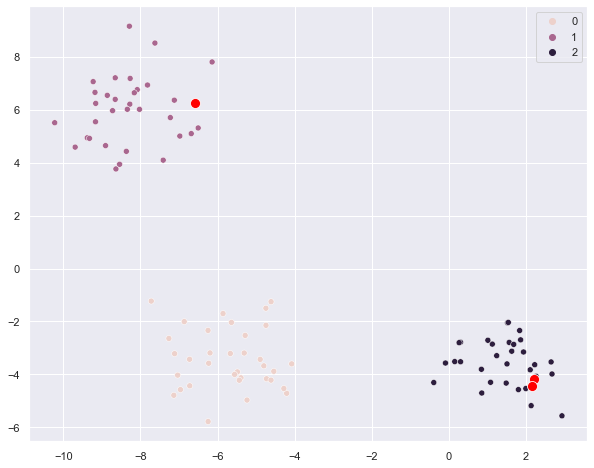

In [10]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
centroid_i = X[np.random.randint(X.shape[0], size=3), :]
sns.scatterplot(centroid_i[:,0], centroid_i[:,1], color='red', s=100)

### Prediction Function: Euclidean distance & find the closest centroid

In [11]:
def Find_Closest_Centroid(X, centroids):
    idx = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.sqrt(np.sum((X[i, :] - centroids)**2, axis=1)))
    return idx

### Compute / Update the new centroid

In [12]:
def Compute_Centroid(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i, :] = np.mean(X[(idx==i).T[0], :], axis=0)
    centroids[np.isnan(centroids)] = 0
    return centroids

### Cost Function (Average Square Distance)

In [13]:
def Cost_Function(X, idx, centroids):
    total_distance = np.zeros(1)
    for i in range(X.shape[0]):
        distance = np.sqrt(np.sum((X[i, :] - centroids[int(idx[i]), :])**2, axis=0))
        total_distance += distance
    return total_distance/X.shape[0]

### Iterate the K-Mean (find the best number of K with Elbow method)

In [14]:
elbow_cost = {}
for num_k in range(1, 10):
    # iterate 100 to reduce the initialize centroid drop into bad local minimum
    costs = []
    for num_initialize in range(100):
        k_init = X[np.random.randint(X.shape[0], size=num_k), :]

        while True:
            idx = Find_Closest_Centroid(X, k_init)
            k_new = Compute_Centroid(X, idx, num_k)
            
            
            if (k_new == k_init).all() == True:
                costs.append(Cost_Function(X, idx, k_new))
                break
            else:
                k_init = k_new

        elbow_cost[num_k] = min(costs)

Based on the elbow method, 3-centroids is the best number to classify the data


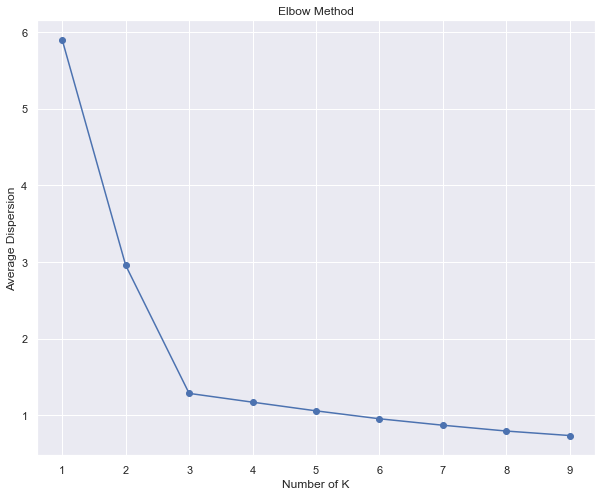

In [15]:
_ = plt.plot(list(elbow_cost.keys()), list(elbow_cost.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of K')
plt.ylabel('Average Dispersion')
print('Based on the elbow method, 3-centroids is the best number to classify the data')

### Given 3 centroids are the best number, we iterate it for 100 time to avoid bad local minimium and show the best classification

In [20]:
num_k = 3
best_cost = 999
best_centroid = np.zeros((num_k, X.shape[1]))

# iterate 100 to reduce the initialize centroid drop into bad local minimum
for num_initialize in range(100):
    k_init = X[np.random.randint(X.shape[0], size=num_k), :]

    while True:
        idx = Find_Closest_Centroid(X, k_init)
        k_new = Compute_Centroid(X, idx, num_k)

        if (k_new == k_init).all() == True:
            mean_cost = Cost_Function(X, idx, k_new)
            if mean_cost < best_cost:
                best_cost = mean_cost
                best_centroid = k_new
            break
        else:
            k_init = k_new

the best 3 centroid:
[[-5.69154024 -3.41741789]
 [-8.24989394  5.97638058]
 [ 1.4760371  -3.59427862]]


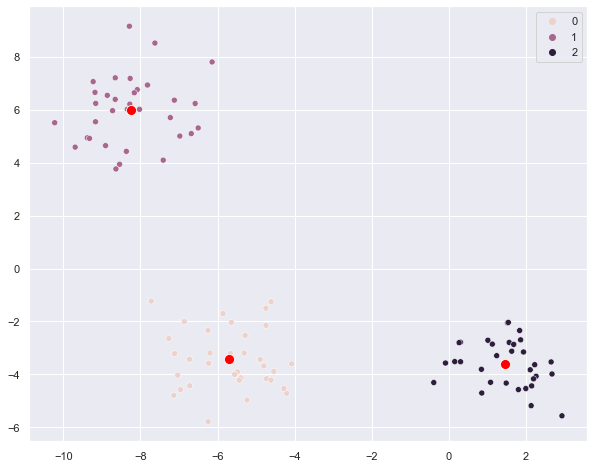

In [21]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
centroid_i = X[np.random.randint(X.shape[0], size=3), :]
sns.scatterplot(k_new[:,0], k_new[:,1], color='red', s=100)
print('the best 3 centroid:')
print(f'{best_centroid}')